# Lap EDA_Round 2 Modelling

In [5759]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## loading / cleaning data

In [5760]:
ca_df=pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv")

In [5761]:
ca_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5762]:
# droping Columns

ca_df.drop(['Unnamed: 0'],axis=1, inplace=True)
ca_df.drop(['Customer'],axis=1, inplace=True)

ca_df.drop(['Number of Open Complaints'],axis=1, inplace=True)
ca_df.drop(['Effective To Date'],axis=1, inplace=True)
ca_df.drop(['Months Since Last Claim'],axis=1, inplace=True)
ca_df.drop(['Number of Policies'],axis=1, inplace=True)

In [5763]:
# droping duplicates

#ca_df.drop_duplicates(inplace=True)

In [5764]:
# fixing "Income"

ca_df["Income"].replace(0, np.nan, inplace=True)

In [5765]:
# droping nan values

ca_df.dropna(inplace=True)

### removing outliers

In [5766]:
Q1 = ca_df["Customer Lifetime Value"].quantile(0.25)
Q3 = ca_df["Customer Lifetime Value"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (ca_df["Customer Lifetime Value"] >= Q1 - 1.5 * IQR) & (ca_df["Customer Lifetime Value"] <= Q3 + 1.5 *IQR)
ca_df = ca_df.loc[filter]

Q1 = ca_df["Monthly Premium Auto"].quantile(0.25)
Q3 = ca_df["Monthly Premium Auto"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (ca_df["Monthly Premium Auto"] >= Q1 - 1.5 * IQR) & (ca_df["Monthly Premium Auto"] <= Q3 + 1.5 *IQR)
ca_df = ca_df.loc[filter] 

Q1 = ca_df["Total Claim Amount"].quantile(0.25)
Q3 = ca_df["Total Claim Amount"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (ca_df["Total Claim Amount"] >= Q1 - 1.5 * IQR) & (ca_df["Total Claim Amount"] <= Q3 + 1.5 *IQR)
ca_df = ca_df.loc[filter]

## X Y split

In [5767]:
X=ca_df.drop("Total Claim Amount", axis=1)
y=ca_df["Total Claim Amount"]

## Data Splitting

In [5768]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [5769]:
y_train =y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Data Transformation

### Hot coding Categorical Variables

In [5770]:
X_train_categorical=X_train.select_dtypes("object")
X_train_categorical

X_test_categorical=X_test.select_dtypes("object")
X_test_categorical

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
10399,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer2,Web,Luxury Car,Medsize,A
855,Arizona,No,Premium,Master,Employed,M,Urban,Married,Personal Auto,Personal L2,Offer1,Call Center,SUV,Medsize,A
3073,Arizona,Yes,Basic,College,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Agent,Sports Car,Medsize,A
1068,Arizona,No,Extended,Master,Employed,F,Rural,Married,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,A
3316,Nevada,No,Basic,Master,Employed,F,Urban,Divorced,Corporate Auto,Corporate L3,Offer1,Call Center,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,Nevada,No,Basic,Bachelor,Employed,M,Suburban,Divorced,Personal Auto,Personal L1,Offer1,Branch,Sports Car,Small,A
9522,Arizona,Yes,Basic,High School or Below,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Medsize,A
10749,Arizona,No,Extended,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L3,Offer2,Web,SUV,Small,A
9674,Washington,No,Extended,Master,Employed,M,Rural,Married,Special Auto,Special L3,Offer1,Branch,SUV,Medsize,A


In [5771]:
X_train_categorical=pd.get_dummies(X_train_categorical, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_train_categorical).toarray(),
columns=OneHotEncoder(drop='first').fit(X_train_categorical).get_feature_names(input_features=X_train_categorical.columns))

X_test_categorical=pd.get_dummies(X_test_categorical, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_test_categorical).toarray(),
columns=OneHotEncoder(drop='first').fit(X_test_categorical).get_feature_names(input_features=X_test_categorical.columns))


,State_California_1,State_Nevada_1,State_Oregon_1,State_Washington_1,Response_Yes_1,Coverage_Extended_1,Coverage_Premium_1,Education_College_1,Education_Doctor_1,Education_High School or Below_1,...,Sales Channel_Branch_1,Sales Channel_Call Center_1,Sales Channel_Web_1,Vehicle Class_Luxury Car_1,Vehicle Class_Luxury SUV_1,Vehicle Class_SUV_1,Vehicle Class_Sports Car_1,Vehicle Class_Two-Door Car_1,Vehicle Size_Medsize_1,Vehicle Size_Small_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
972,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
973,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
974,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5772]:
X_train_categorical = X_train_categorical.reset_index(drop=True)
X_test_categorical = X_test_categorical.reset_index(drop=True)

### Standardize numerical

In [5773]:
X_train_numerical=X_train._get_numeric_data()
X_train_numerical

X_test_numerical=X_test._get_numeric_data()
X_test_numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception
10399,16068.348380,70140.0,199,15
855,5619.068508,50335.0,140,54
3073,8658.863813,62464.0,109,45
1068,3208.919835,40135.0,80,70
3316,7792.067056,36776.0,65,21
...,...,...,...,...
3855,12265.600410,35693.0,103,63
9522,5639.941974,73168.0,70,50
10749,5411.936509,81531.0,135,50
9674,5512.342258,45971.0,138,91


pt = PowerTransformer(standardize=False).fit(X_train_numerical)
X_train_scal = pt.transform(X_train_numerical)
X_test_scal = pt.transform(X_test_numerical)

In [5774]:
std_scaler=StandardScaler().fit(X_train_numerical)   ## finding the parameters (mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train_numerical)

In [5775]:
X_test_scaled=std_scaler.transform(X_test_numerical)

In [5776]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.78012784  1.62888241 -0.53353971 -1.54734092]
 [ 1.14382504 -0.25256742  1.21879381 -1.44047015]
 [ 0.39963131 -1.00882583  3.21706887 -1.19110504]
 ...
 [-0.50248079 -1.62382537 -0.81022395 -0.33613892]
 [ 0.19364713 -0.93813383  0.17354223  0.62569796]
 [ 0.47273779  0.92175389 -0.77948126  1.7300292 ]]
--------
[[ 2.97979516  0.81356802  3.30929695 -1.15548145]
 [-0.25925015 -0.01242315  1.49547805  0.23383849]
 [ 0.68301907  0.49343128  0.54245455 -0.0867738 ]
 ...
 [-0.32345648  1.28864328  1.34176458  0.09134414]
 [-0.29233292 -0.19442898  1.43399266  1.55191126]
 [ 1.13932835  0.35863686 -0.19537009  0.98193384]]


In [5777]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train_numerical.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test_numerical.columns)

In [5778]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)

### QuantileTransformer

In [5779]:
qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled["Income"].to_numpy().reshape(-1,1))
X_train_scaled["Income"] = qt.transform(X_train_scaled["Income"].to_numpy().reshape(-1,1))
X_test_scaled["Income"] = qt.transform(X_test_scaled["Income"].to_numpy().reshape(-1,1))

qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled["Customer Lifetime Value"].to_numpy().reshape(-1,1))
X_train_scaled["Customer Lifetime Value"] = qt.transform(X_train_scaled["Customer Lifetime Value"].to_numpy().reshape(-1,1))
X_test_scaled["Customer Lifetime Value"] = qt.transform(X_test_scaled["Customer Lifetime Value"].to_numpy().reshape(-1,1))

#qt = QuantileTransformer(output_distribution="normal").fit(y_train.to_numpy().reshape(-1,1))
#y_train = qt.transform(y_train.to_numpy().reshape(-1,1))
#y_test = qt.transform(y_test.to_numpy().reshape(-1,1))


total_claim_amount_transformer = pt.fit(y_train.to_numpy().reshape(-1,1))

y_train = pd.DataFrame(total_claim_amount_transformer.transform(y_train.to_numpy().reshape(-1,1)))
y_test = pd.DataFrame(total_claim_amount_transformer.transform(y_test.to_numpy().reshape(-1,1)))

## Concatination 

In [5780]:
X_train_con=pd.concat([X_train_scaled,X_train_categorical],axis=1)
X_test_con=pd.concat([X_test_scaled,X_test_categorical],axis=1)

In [5781]:
X_test_con

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2.622618,0.696516,3.309297,-1.155481,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,0.003609,0.047930,1.495478,0.233838,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.811151,0.444507,0.542455,-0.086774,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,-0.924787,-0.247470,-0.349084,0.803816,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.498148,-0.371845,-0.810224,-0.941740,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1.473796,-0.407177,0.357998,0.554451,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
972,0.015150,0.785036,-0.656510,0.091344,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
973,-0.098229,1.109716,1.341765,0.091344,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
974,-0.052459,-0.066386,1.433993,1.551911,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


## Apply Linear Regression

In [5782]:
X.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto',
       'Months Since Policy Inception', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

### Modeling using Statsmodels

In [5783]:
X_train_const_scaled = sm.add_constant(X_train_con) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_con) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     194.0
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:30:45   Log-Likelihood:                -13989.
No. Observations:                2276   AIC:                         2.807e+04
Df Residuals:                    2231   BIC:                         2.833e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [5784]:
predictions_test

0      992.426731
1      523.052564
2      383.487060
3       56.076021
4      221.744549
          ...    
971    528.278482
972    411.228282
973    530.565972
974    306.386106
975    473.425811
Length: 976, dtype: float64

In [5785]:
#display adjusted R-squared
print(model.rsquared_adj)

0.7886934569205171


### Modeling using Scikit Learn

In [5786]:
model=LinearRegression()    # model
model.fit(X_train_con, y_train)   # model train

LinearRegression()

In [5787]:
model.coef_

array([ 6.82348089e+00, -9.16255765e+00,  1.63460321e+02, -2.47822544e+00,
       -2.21956731e+00, -1.28636489e+01, -5.28767838e+00, -3.31326734e+00,
       -9.00031179e+00, -1.54464947e+01, -3.92119853e+01, -3.29117545e+00,
       -2.68656737e+00,  4.98492300e+00, -6.20891831e+00,  1.09612086e+00,
        2.49963633e+01, -8.50302653e+00,  1.00291793e+01,  3.69166410e+02,
        2.15860647e+02, -6.05609059e+00,  1.52931043e+00,  1.44576424e+01,
        2.13806556e+01, -4.39708024e+00,  1.39213013e+01,  1.32086747e+01,
        2.58918140e+00, -1.34021364e+00,  3.51984895e+01, -5.55633398e+00,
       -8.26149987e+00,  1.29753705e+01,  7.57338018e+00,  1.24739056e+01,
       -1.80520571e-01,  4.49778938e+00,  3.35948249e+00, -8.38728279e+01,
       -3.86427151e+01, -4.61990170e+01, -7.11356053e+01,  9.59520820e-01,
        2.20785049e+00,  7.03566851e+00])

In [5788]:
model.intercept_

126.53288077485288

Making prediction

In [5789]:
y_pred=model.predict(X_test_con)   # model prediction
##y_pred_train=model.predict(X_train_scaled)

In [5790]:
y_test

0      955.200000
1      456.523850
2      400.181882
3       78.008093
4      240.186527
          ...    
971    494.400000
972    425.800112
973    420.434259
974    139.826393
975    408.000000
Name: Total Claim Amount, Length: 976, dtype: float64

In [5791]:
y_pred

array([ 9.92426731e+02,  5.23052564e+02,  3.83487060e+02,  5.60760212e+01,
        2.21744549e+02,  2.37972060e+02,  3.82764806e+02,  5.56214037e+02,
        3.88464873e+02,  1.68555670e+02,  3.94832608e+02,  4.19997271e+02,
        1.99162124e+02,  3.05609085e+02,  2.94435926e+01,  2.76675430e+02,
        4.24903013e+02,  9.41687484e+02,  3.83107777e+02,  6.32576716e+02,
        3.82358370e+02,  5.45929397e+02,  1.75183086e+02,  5.16862536e+02,
        2.78918998e+00,  5.05628605e+02,  5.70121435e+02,  8.26451416e+02,
        4.97676921e+02,  3.73951614e+02,  3.21437851e+02,  2.94175733e+02,
        6.33453078e+02,  3.69107069e+02,  2.68177390e+02,  3.27085132e+01,
        4.79874228e+02,  4.12502668e+02,  1.22360561e+02,  1.07585283e+03,
        4.08759405e+02,  4.43634900e+02,  1.60934829e+02,  2.79262964e+02,
        3.87734184e+02,  2.38994596e+02,  5.85169293e+02,  4.95626897e+02,
        1.91314856e+02,  4.17717819e+02,  6.23512586e+02,  6.83707345e+01,
        3.65662865e+02,  

In [5792]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
0,955.200000,992.426731
1,456.523850,523.052564
2,400.181882,383.487060
3,78.008093,56.076021
4,240.186527,221.744549
...,...,...
971,494.400000,528.278482
972,425.800112,411.228282
973,420.434259,530.565972
974,139.826393,306.386106


Linear Regression
Train-test split.
Standardize the data (after the data split).
Apply linear regression.
Model Interpretation.
Model Validation
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

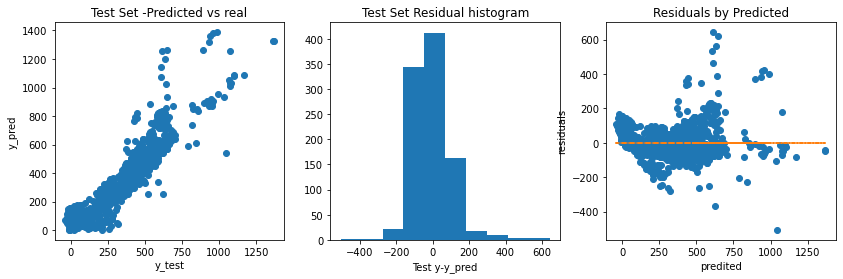

In [5793]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<b> Error metrics

In [5794]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

10454.755488526398
74.80176460490114


In [5795]:
R2=r2_score(y_test,y_pred)
R2

0.8080084345595971

In [5796]:
X_test.shape[1]

19

In [5797]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.8041927026104678

#### Feature Importance

In [5798]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_con.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance')

In [5799]:
features_importances

,Attribute,Importance
36,Sales Channel_Branch,0.180521
43,Vehicle Class_Two-Door Car,0.959521
15,EmploymentStatus_Employed,1.096121
29,Policy_Personal L3,1.340214
22,Marital Status_Single,1.529310
44,Vehicle Size_Medsize,2.207850
4,State_California,2.219567
3,Months Since Policy Inception,2.478225
28,Policy_Personal L2,2.589181
12,Education_Doctor,2.686567


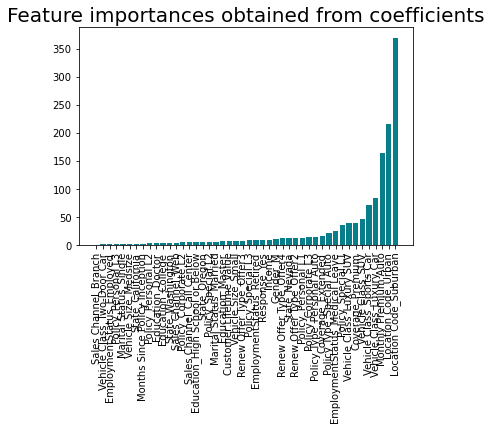

In [5800]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Evaluating predictions

In [5801]:
# MAE: mean absolute error
MAE = np.mean( np.abs( y_test - y_pred ) )
MAE

74.80176460490128

In [5802]:
# MSE: mean squared error
MSE = np.mean( np.power( y_test - y_pred , 2 ) )
MSE

10454.755488526413

In [5803]:
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
RMSE

102.24849871037918